# 1. Downloads

## A. Kagglehub

In [15]:
# Install and Update Kagglehub to latest version
!pip install --upgrade kagglehub

In [16]:
# check location and version of kagglehub
!pip show kagglehub

Name: kagglehub
Version: 0.3.13
Summary: Access Kaggle resources anywhere
Home-page: https://github.com/Kaggle/kagglehub
Author: 
Author-email: Kaggle <support@kaggle.com>
License: Apache License
                                   Version 2.0, January 2004
                                http://www.apache.org/licenses/
        
           TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION
        
           1. Definitions.
        
              "License" shall mean the terms and conditions for use, reproduction,
              and distribution as defined by Sections 1 through 9 of this document.
        
              "Licensor" shall mean the copyright owner or entity authorized by
              the copyright owner that is granting the License.
        
              "Legal Entity" shall mean the union of the acting entity and all
              other entities that control, are controlled by, or are under common
              control with that entity. For the purposes of thi

## B. 'ipwidgets'

In [17]:
!pip install ipywidgets

# 2. Imports

In [37]:
import os
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, List

# 3. Custom Methods

## 3.1 'null_sumary' function

In [2]:
def null_summary(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns a dataframe summarizing null values in each column,
    sorted by null percentage (descending).
    
    Columns:
        - column: Column name
        - null_count: Number of null values
        - null_percent: Percentage of null values in that column
    """
    total_rows = len(df)

    summary_df = (
        df.isnull()
          .sum()
          .reset_index()
          .rename(columns={"index": "column", 0: "null_count"})
    )

    summary_df["null_percent"] = (
        (summary_df["null_count"] / total_rows) * 100
    ).round(2)

    # 🔥 Sort by null percentage in descending order
    summary_df = summary_df.sort_values(by="null_percent", ascending=False)

    return summary_df

## 3.2 'print_value_counts' function

In [3]:
def print_value_counts(df: pd.DataFrame, exclude_cols=None):
    """
    Prints value counts for each column in the dataframe,
    except the ones mentioned in exclude_cols.
    
    Parameters:
        df: DataFrame
        exclude_cols: list of column names to exclude (optional)
    """
    if exclude_cols is None:
        exclude_cols = []

    for col in df.columns:
        if col in exclude_cols:
            continue  # skip excluded columns
        
        print(f"\n==================== {col} ====================")
        print(df[col].value_counts(dropna=False))

# 4. Download Dataset

In [4]:
# Download the latest version of the dataset from Kaggle
DATA_PATH = kagglehub.dataset_download("imakash3011/customer-personality-analysis")

print("Dataset downloaded to:", DATA_PATH)
print("Files in dataset directory:", os.listdir(DATA_PATH))

Dataset downloaded to: C:\Users\Anirudh Jayant\.cache\kagglehub\datasets\imakash3011\customer-personality-analysis\versions\1
Files in dataset directory: ['marketing_campaign.csv']


# 5. Loading Dataset

In [5]:
# Adjust filename if needed based on actual listing above
csv_path = os.path.join(DATA_PATH, "marketing_campaign.csv")

In [6]:
# Check the separator used in the CSV file
with open(csv_path, "r", encoding="utf-8") as f:
    for _ in range(5):
        print(f.readline())

ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeatProducts	MntFishProducts	MntSweetProducts	MntGoldProds	NumDealsPurchases	NumWebPurchases	NumCatalogPurchases	NumStorePurchases	NumWebVisitsMonth	AcceptedCmp3	AcceptedCmp4	AcceptedCmp5	AcceptedCmp1	AcceptedCmp2	Complain	Z_CostContact	Z_Revenue	Response

5524	1957	Graduation	Single	58138	0	0	04-09-2012	58	635	88	546	172	88	88	3	8	10	4	7	0	0	0	0	0	0	3	11	1

2174	1954	Graduation	Single	46344	1	1	08-03-2014	38	11	1	6	2	1	6	2	1	1	2	5	0	0	0	0	0	0	3	11	0

4141	1965	Graduation	Together	71613	0	0	21-08-2013	26	426	49	127	111	21	42	1	8	2	10	4	0	0	0	0	0	0	3	11	0

6182	1984	Graduation	Together	26646	1	0	10-02-2014	26	11	4	20	10	3	5	2	2	0	4	6	0	0	0	0	0	0	3	11	0



In [22]:
pd.set_option('display.max_columns', None)

In [7]:
# Loading the dataset with the correct separator
df = pd.read_csv(csv_path, sep="\t", encoding="utf-8") 
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [24]:
pd.reset_option('display.max_columns')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [29]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,2.634375,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.764184,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274


# 6. Data Analysis

## 6.1 Null value analysis

In [30]:
print(null_summary(df))

                 column  null_count  null_percent
4                Income          24          1.07
0                    ID           0          0.00
1            Year_Birth           0          0.00
2             Education           0          0.00
3        Marital_Status           0          0.00
5               Kidhome           0          0.00
6              Teenhome           0          0.00
7           Dt_Customer           0          0.00
8               Recency           0          0.00
9              MntWines           0          0.00
10            MntFruits           0          0.00
11      MntMeatProducts           0          0.00
12      MntFishProducts           0          0.00
13     MntSweetProducts           0          0.00
14         MntGoldProds           0          0.00
15    NumDealsPurchases           0          0.00
16      NumWebPurchases           0          0.00
17  NumCatalogPurchases           0          0.00
18    NumStorePurchases           0          0.00


In [55]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

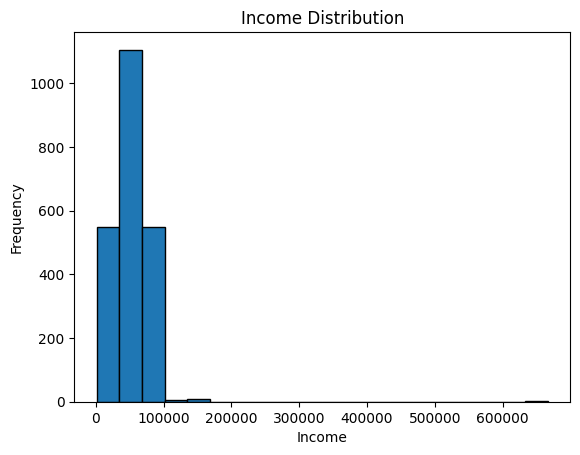

In [9]:
plt.hist(df["Income"], bins=20, edgecolor='black')
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Income Distribution")
plt.show()

Since, it is skewed data so using medain for data imputation is an idea choice.

## 6.2 Value Count Analysis

In [33]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [52]:
# Cols to be excluded
cols_to_be_excluded = ['ID', 'Dt_Customer', 'Income', 'Year_Birth',
                        'MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Recency']
print_value_counts(df, exclude_cols=cols_to_be_excluded)


==================== Education ====================
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

==================== Marital_Status ====================
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

==================== Kidhome ====================
Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

==================== Teenhome ====================
Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64

==================== NumDealsPurchases ====================
NumDealsPurchases
1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
11      5
10      5
12      4
13      3
Name: count, dtype: int64

==================== NumWebPurchases ====================
NumWebPurchases
2     373
1     354
3     3

## 6.3 Findings

1. 'Marital_Status' have some wierd categories - Alone, Absurd, YOLO - which can be clubbed under one category 'Other'.

2. 'Education' have one category - 2n Cycle - which is equivalent to 'Undergraduate' so we will replace '2n Cycle' with this.

3. Z_CostContact have '3' for all 2240 rows and, similarly, Z_Revenue have '11' for all 2240 rows. Since, they both have zero variance so it is good to remove them.

4. 'NumWebPurchases' (23, 25 & 27) and 'NumCatalogPurchases' (22 & 28) have some rare outliers. So, it is safe to cap these values.

5. We 'll impute 'Income' null values with the median becuase it is skewed.

6. Date column 'Dt_Customer' must be converted to data type

# 7. Data Cleaning

In [10]:
# Create a deep copy of the dataframe for backup
backup_df = df.copy(deep=True)

# Quick check
backup_df.shape

(2240, 29)

## 7.1 'Marital Status'

In [11]:
marital_map = {
    "Married": "Married",
    "Together": "Together",
    "Single": "Single",
    "Divorced": "Divorced",
    "Widow": "Widow",
    "Alone": "Single",   # Usually means living alone
    "Absurd": "Other",
    "YOLO": "Other"
}
df["Marital_Status"] = df["Marital_Status"].map(marital_map)
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Other         4
Name: count, dtype: int64

In [ ]:
# lowering the "Marital_Status" column values for comparison later on
df["Marital_Status"] = df["Marital_Status"].str.strip().str.lower()

## 7.2 'Education'

In [ ]:
edu_map = {
    "Graduation": "Graduate",
    "PhD": "PhD",
    "Master": "Master",
    "2n Cycle": "Undergraduate",
    "Basic": "Basic"
}
df["Education"] = df["Education"].map(edu_map)
df["Education"].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
# lowering the "Education" column values for comparison later on
df["Education"] = df["Education"].str.strip().str.lower()

## 7.3 Dropping constant columns
- Z_Revenue
- Z_CostContact 

In [13]:
df.shape

(2240, 29)

In [14]:
df.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)
df.shape

(2240, 27)

## 7.4 Capping Outliers
- NumWebPurchases, and
- NumCatalogPurchases

In [15]:
cols = ["NumWebPurchases", "NumCatalogPurchases"]
for col in cols:
    df[col] = df[col].clip(upper=round(df[col].quantile(0.99)))
    print(f'----Value count for {col} after cleaining----')
    print(df[col].value_counts())

----Value count for NumWebPurchases after cleaining----
NumWebPurchases
2     373
1     354
3     336
4     280
5     220
6     205
7     155
8     102
9      75
0      49
11     48
10     43
Name: count, dtype: int64
----Value count for NumCatalogPurchases after cleaining----
NumCatalogPurchases
0     586
1     497
2     276
3     184
4     182
5     140
6     128
7      79
8      55
10     48
9      42
11     23
Name: count, dtype: int64


## 7.5 Handling null values in 'Income' column

In [20]:
print(df['Income'].isnull().sum())

24


In [21]:
df["Income"].fillna(df["Income"].median(), inplace=True)
print(df['Income'].isnull().sum())

0


## 7.6 Date Time conversion

In [25]:
df['Dt_Customer'].dtype

dtype('O')

In [27]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

Note: => The format is 'DD-MM-YYYY

In [28]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
df['Dt_Customer'].dtype

dtype('<M8[ns]')

# 8. Derived Metrics

In [30]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [31]:
df.shape

(2240, 27)

In [ ]:
# Children = Kidhome + Teenhome
df["Total_Children"] = (
    df["Kidhome"].fillna(0).astype(int)
    + df["Teenhome"].fillna(0).astype(int)
)
df["Total_Children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2240, dtype: int64

In [33]:
purchase_cols = [
        "NumWebPurchases",
        "NumCatalogPurchases",
        "NumStorePurchases",
        "NumWebVisitsMonth"
    ]
df["Total_Purchases"] = df[purchase_cols].sum(axis=1)

df["Total_Purchases"]

0       29
1        9
2       24
3       12
4       19
        ..
2235    21
2236    22
2237    24
2238    24
2239    15
Name: Total_Purchases, Length: 2240, dtype: int64

In [ ]:
import numpy as np

# 3. Creating 'Customer_Tenure' feature
# CustomerTenureDays = latest Dt_Customer - Dt_Customer
if df["Dt_Customer"].notna().any():
    ref_date = df["Dt_Customer"].max()
    df["CustomerTenureDays"] = (ref_date - df["Dt_Customer"]).dt.days
else:
    df["CustomerTenureDays"] = np.nan

df["CustomerTenureDays"]

In [38]:
# 4. Creating 'TotalSpend' feature

# TotalSpend = sum of all product spends
SPEND_COLUMNS: List[str] = [
"MntWines",
"MntFruits",
"MntMeatProducts",
"MntFishProducts",
"MntSweetProducts",
"MntGoldProds",
]

df["TotalSpend"] = df[SPEND_COLUMNS].sum(axis=1)

In [39]:
df["TotalSpend"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: TotalSpend, Length: 2240, dtype: int64

In [40]:
# IsHighValue = top 20% by TotalSpend
high_value_threshold = df["TotalSpend"].quantile(0.80)
df["IsHighValue"] = df["TotalSpend"] >= high_value_threshold
df["IsHighValue"]

0        True
1       False
2       False
3       False
4       False
        ...  
2235     True
2236    False
2237     True
2238    False
2239    False
Name: IsHighValue, Length: 2240, dtype: bool

In [43]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Total_Purchases,CustomerTenureDays,TotalSpend,IsHighValue
0,5524,1957,NaN,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,1,0,29,663,1617,True
1,2174,1954,NaN,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,2,9,113,27,False
2,4141,1965,NaN,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,24,312,776,False
3,6182,1984,NaN,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,1,12,139,53,False
4,5324,1981,NaN,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,1,19,161,422,False
